# Anomalies in timeseries data with CausalImpact

The purpose of this notebook is to get me acquainted with Causalimpact for time series analysis.

# Libraries

In [36]:
#mathematical
import numpy as np
from scipy.fft import fft, ifft

#data mainipulation
import pandas as pd

#modelling
from causalimpact import CausalImpact

#plotting
import matplotlib.pyplot as plt

# The Dataset

Note that the dataset comes from the UCI data repository. 
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer

A quick description for the data set:
frequency = 52 Hertz
ax = x acceleration
ay = y acceleration
az = z acceleration
y = total acceleration
act_type = type of activity

From UCI """

--- 1: Working at Computer 

--- 2: Standing Up, Walking and Going updown stairs 

--- 3: Standing 

--- 4: Walking 

--- 5: Going UpDown Stairs 

--- 6: Walking and Talking with Someone 

--- 7: Talking while Standing

"""

In [39]:
freq = 52

df = pd.read_csv('~/KinKeepers/ProjectAI/Data/UCIActivityData.csv',header = None,index_col = False)
df.columns = ['ds','ax','ay','az','act_type']

df['y'] = np.sqrt(np.power(df[['ax','ay','az']],2).sum(axis = 1)) #calculate total acceleration

df.ds = df.ds.astype(int)
df.head()

,ds,ax,ay,az,act_type,y
0,0,1502,2215,2153,1,3434.768988
1,1,1667,2072,2047,1,3355.932359
2,2,1611,1957,1906,1,3171.435952
3,3,1601,1939,1831,1,3110.543843
4,4,1643,1965,1879,1,3176.683018


# Data exploration

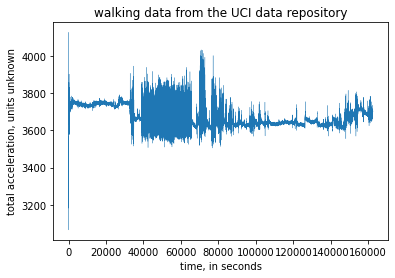

In [26]:
plt.plot(df.ds,df.y,linewidth = 0.3)
plt.title('walking data from the UCI data repository')
plt.xlabel('time, in seconds')
plt.ylabel('total acceleration, units unknown')
plt.show()

In [27]:
df = df.iloc[400:] #to remove the large anomalies close to time = 0
df.head()

,ds,ax,ay,az,act_type,y
400,400,1940,2368,2151,1,3741.366729
401,401,1936,2371,2153,1,3742.344987
402,402,1939,2379,2154,1,3749.543706
403,403,1943,2379,2154,1,3751.613786
404,404,1942,2363,2157,1,3742.697156


/Users/yousefnami/python_environments/KinKeepers_AI/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


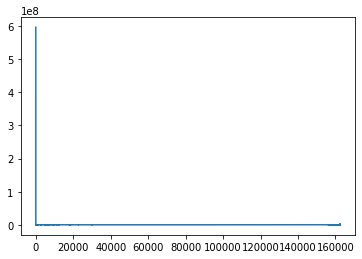

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.39 (0.27)      3611.81 (8.04)
95% CI                    [119.88, 120.93]   [3596.28, 3627.8]

Absolute effect (s.d.)    4.84 (0.27)        145.06 (8.04)
95% CI                    [4.3, 5.35]        [129.06, 160.58]

Relative effect (s.d.)    4.02% (0.22%)      4.02% (0.22%)
95% CI                    [3.57%, 4.45%]     [3.57%, 4.45%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.88, 120.93].
Subtracting this prediction from t

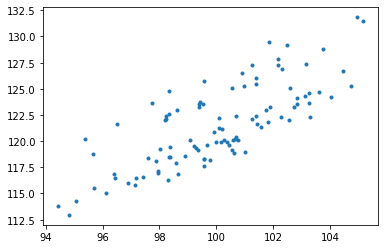

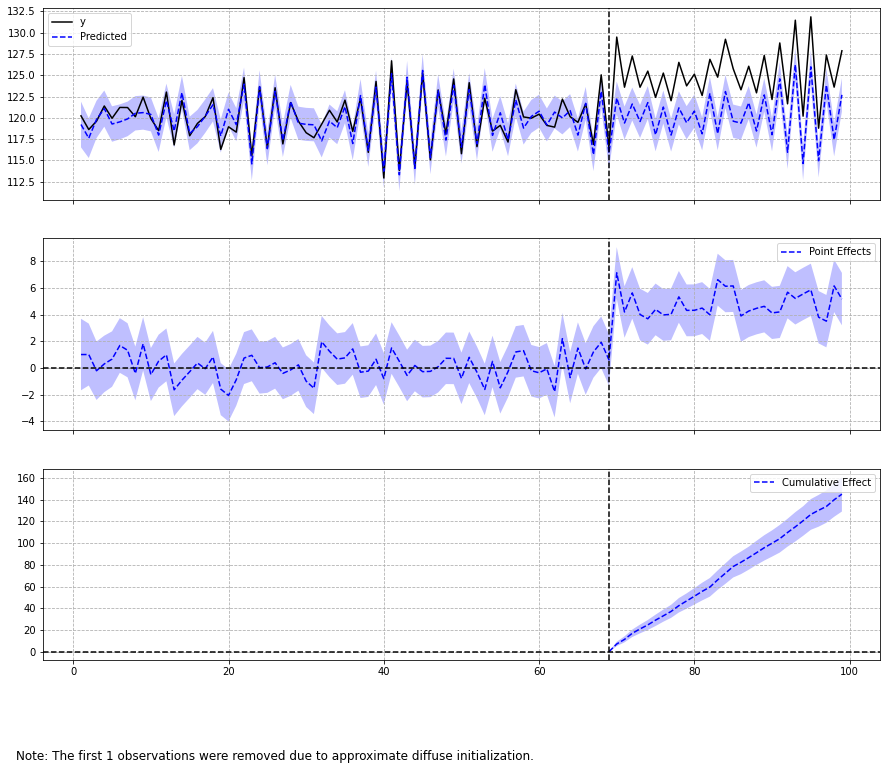